In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-twitter-sentiment-cleancsv/airline_twitter_sentiment_clean.csv


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("../input/airline-twitter-sentiment-cleancsv/airline_twitter_sentiment_clean.csv")

In [7]:
data.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448223,False,finalized,3,2/25/15 1:57,negative,1.0000,Customer Service Issue,1.0000,NaN,Cuschoolie1,NaN,0,"@VirginAmerica help, left expensive headphones...","[33.94209449, -118.40410103]",2/23/15 21:10,5.700880e+17,Washington DC,Quito
1,681452067,False,finalized,3,2/25/15 0:41,negative,1.0000,Flight Booking Problems,0.6939,NaN,MERBARAT,NaN,0,@united very exasperating I'm having a difficu...,"[41.86591215, -87.6231126]",2/20/15 21:36,5.690080e+17,"Chicago, IL",Central Time (US & Canada)
2,681451479,False,finalized,3,2/25/15 4:43,neutral,1.0000,NaN,NaN,NaN,CoachMcRoberts,NaN,0,@united Can you help me get a flight out tonig...,NaN,2/21/15 16:58,5.693000e+17,"Oxford, MS",NaN
3,681456798,False,finalized,3,2/25/15 3:27,negative,1.0000,Flight Booking Problems,1.0000,NaN,4starcashier,NaN,0,"@SouthwestAir 4/9/14, I need to fly from GSP t...",NaN,2/17/15 12:37,5.677850e+17,"Des Moines, Iowa",Central Time (US & Canada)
4,681461929,False,finalized,3,2/25/15 3:50,negative,1.0000,Damaged Luggage,0.6663,NaN,WTFloris,NaN,0,"@USAirways Oh yes, because I had loads of time...",NaN,2/21/15 1:54,5.690730e+17,Raxacoricofallapatorius,Amsterdam
5,681453541,False,finalized,3,2/25/15 9:04,neutral,1.0000,NaN,NaN,NaN,lorenzosimpson,NaN,0,@united i now see it's 72 hours. Thanks,NaN,2/18/15 17:50,5.682260e+17,NaN,Eastern Time (US & Canada)
6,681457766,False,finalized,3,2/25/15 7:40,positive,1.0000,NaN,NaN,NaN,WeChiefMusic,NaN,0,@JetBlue ok thanks. Safety first.,NaN,2/22/15 19:57,5.697080e+17,Planet Brooklyn,Atlantic Time (Canada)
7,681455921,False,finalized,3,2/25/15 0:59,neutral,1.0000,NaN,NaN,NaN,stefughknee,NaN,0,@SouthwestAir when can I start Flight Booking ...,NaN,2/19/15 13:12,5.685180e+17,NaN,NaN
8,681452831,False,finalized,3,2/25/15 2:38,neutral,0.6709,NaN,0.0000,NaN,jnay777,NaN,0,@united LGJW7B. I voluntarily rerouted; 1st le...,NaN,2/19/15 18:06,5.685930e+17,NaN,NaN
9,681454491,False,finalized,3,2/25/15 2:03,negative,1.0000,Customer Service Issue,0.6804,NaN,amymiller305,NaN,0,"@SouthwestAir customer service at FLL, BWI,and...",NaN,2/24/15 4:29,5.701990e+17,South Florida,NaN


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

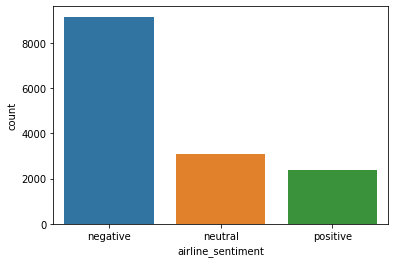

In [8]:
sns.countplot(data = data,x='airline_sentiment')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Customer Service Issue'),
  Text(1, 0, 'Flight Booking Problems'),
  Text(2, 0, 'Damaged Luggage'),
  Text(3, 0, 'Bad Flight'),
  Text(4, 0, 'Cancelled Flight'),
  Text(5, 0, 'Late Flight'),
  Text(6, 0, 'Lost Luggage'),
  Text(7, 0, "Can't Tell"),
  Text(8, 0, 'Flight Attendant Complaints'),
  Text(9, 0, 'longlines')])

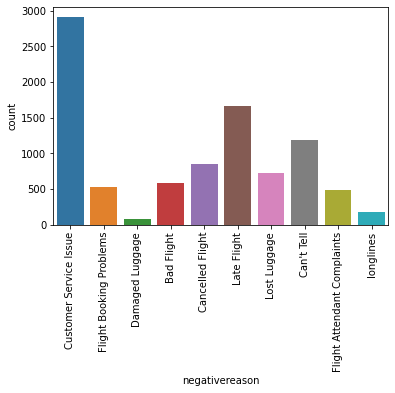

In [9]:
sns.countplot(data=data,x='negativereason')
plt.xticks(rotation=90)

In [10]:
data['airline_sentiment'].value_counts()

negative    9155
neutral     3088
positive    2361
Name: airline_sentiment, dtype: int64

In [11]:
data_frame = data[['airline_sentiment','text']]

In [12]:
data_frame.head()

,airline_sentiment,text
0,negative,"@VirginAmerica help, left expensive headphones..."
1,negative,@united very exasperating I'm having a difficu...
2,neutral,@united Can you help me get a flight out tonig...
3,negative,"@SouthwestAir 4/9/14, I need to fly from GSP t..."
4,negative,"@USAirways Oh yes, because I had loads of time..."


In [13]:
y = data['airline_sentiment']  #OUTPUT
x = data['text']               #INPUT

In [14]:
x.shape

(14604,)

SPLIT TRAINM AND TEST DATA

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y_train,y_test,x_train,x_test = train_test_split(x,y,test_size =0.2 ,random_state =101 )

VECTORIZATION

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [19]:
tfidf.fit(x_train)

TfidfVectorizer(stop_words='english')

In [20]:
x_train_tfidf = tfidf.transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

Model Comparisons

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf,y_train)

MultinomialNB()

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 1000)
log.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

PERFORMANCE EVOLUTION

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train_tfidf,y_train)

In [ ]:
from sklearn.metrics import  plot_confusion_matrix,classification_report


In [ ]:
def report(model):
    preds = model.predict(x_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,x_test_tfidf,y_test)

In [ ]:
print("NB Model")
report(nb)

In [ ]:
report(log)